In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [2]:
data = pd.read_csv('fish.csv')
data.head()


,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [4]:
col_names = ['Type','Weight','Lenght1','Lenght2','lenght3','Height','Width']
data.columns = col_names
data.head()


,Type,Weight,Lenght1,Lenght2,lenght3,Height,Width
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [6]:
X  = data[['Weight','Lenght1']]
X

,Weight,Lenght1
0,290.0,24.0
1,340.0,23.9
2,363.0,26.3
3,430.0,26.5
4,450.0,26.8
...,...,...
79,950.0,48.3
80,1250.0,52.0
81,1600.0,56.0
82,1550.0,56.0


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhoute = []
db_scores = []

wcss = []
for i in range(2,9):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhoute.append(silhouette_score(X,kmeans.labels_))
    db_scores.append(davies_bouldin_score(X,kmeans.labels_))
    print(kmeans.inertia_)
    print(kmeans.labels_)

    
wcss    
silhoute


4395596.050714285
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1]
1890969.7730908147
[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 1 1 1 1 1]
883388.9198273602
[0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 0 0 3 3 1 1 1 1]
608177.8696946241
[1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4
 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 2 1 2
 2 2 2 2 0 0 3 3 3 3]
353612.18144017097
[0 0 0 4 4 4 0 4 4 4 4 4 4 4 1 1 4 1 4 1 1 1 1 1 1 1 1 5 5 5 5 5 5 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 0 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 4 0 4
 4 4 4 4 1 5 5 2 2 2]
216331.34277652166
[5 5 5 3 3 3 5 3 3 3 3 3 6 6 

[np.float64(0.5789291618265734),
 np.float64(0.6173524769107749),
 np.float64(0.6176414871785032),
 np.float64(0.5678382948854619),
 np.float64(0.6004004447000595),
 np.float64(0.6682838995896265),
 np.float64(0.6755559951806555)]

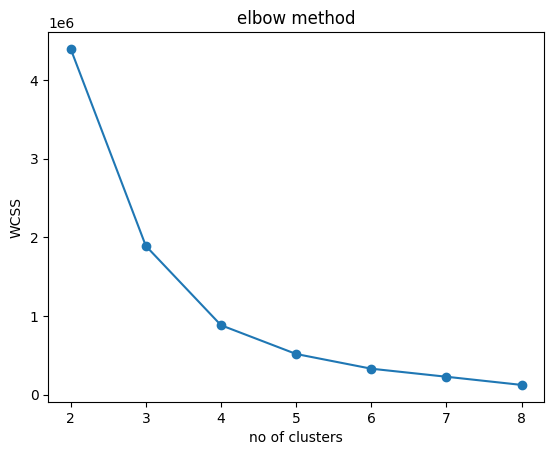

In [27]:
plt.Figure(figsize=(10,6))
plt.plot(range(2,9),wcss,marker = 'o')
plt.title("elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

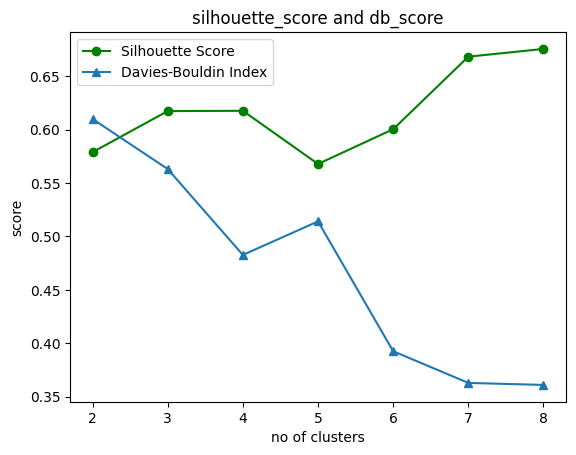

In [31]:
plt.Figure(figsize=(10,8))
plt.plot(range(2,9),silhoute, marker='o', label='Silhouette Score',color = 'green')
plt.plot(range(2,9), db_scores, marker='^', label='Davies-Bouldin Index')
plt.xlabel("no of clusters")
plt.ylabel("score")
plt.title("silhouette_score and db_score")
plt.legend()
plt.show()

#### WCSS: Lower is better

#### Silhouette Score: Closer to 1 is better

#### Davies-Bouldin: Lower is better

In [ ]:
# top cluster 4  
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred_kmeans = kmeans.predict(X)


In [11]:
data['cluster'] = y_pred_kmeans
data

,Type,Weight,Lenght1,Lenght2,lenght3,Height,Width,cluster
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,1
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,1
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,1
...,...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2,0
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7,0
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6,0
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6,0


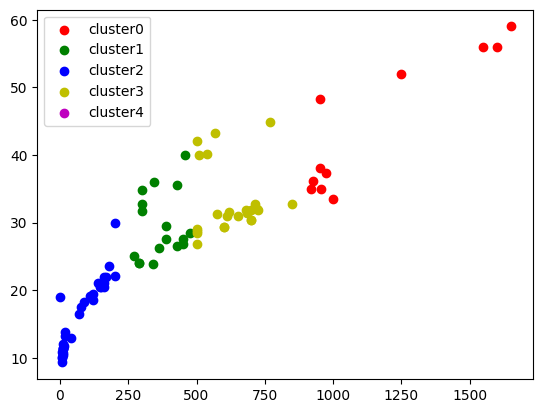

In [14]:
colors = ['r','g','b','y','m']
for i in range(5):
    cluster_data = X[y_pred_kmeans == i]
    plt.scatter(cluster_data['Weight'],
                cluster_data["Lenght1"],
                color = colors[i],
                label = f'cluster{i}')
    plt.legend()

In [ ]:
# cluster to predict cluster for a new fish
def predic_cluster(Weight,Length):
    new_data = [[Weight,Length]]
    cluster = kmeans.predict(new_data)
    return cluster[0]

In [ ]:
new_fish_weight = 290
new_fish_lenght = 24
predcted_cluster = predic_cluster(new_fish_weight,new_fish_lenght)
print(f"fish belongs to cluster {predcted_cluster}")

fish belomngs tpo cluster 4


c:\AI_ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [24]:
silhoute_avg1 = silhouette_score(X,y_pred_kmeans)
print(silhoute_avg1)

0.5588912103872488


In [67]:
X

,Weight,Lenght1
0,290.0,24.0
1,340.0,23.9
2,363.0,26.3
3,430.0,26.5
4,450.0,26.8
...,...,...
79,950.0,48.3
80,1250.0,52.0
81,1600.0,56.0
82,1550.0,56.0


### custom kmeans

In [50]:
import numpy as np
class kmeanscust:
    def __init__(self,K,max_iter = 100):
        self.K = K
        self.max_iter = max_iter
        self.centroids = None
        self.labels_ = None

    def fit(self,X):
       X = X.values
       n_samples,n_features = X.shape
       random_indices = np.random.choice(n_samples,self.K,replace = False)
       self.centroids = X[random_indices]
       for _ in range(self.max_iter):
            distances = np.linalg.norm(X[:,np.newaxis] - self.centroids,axis = 2)
            labels = np.argmin(distances,axis = 1)
            new_centroids = np.array([X[labels == k].mean(axis = 0) if np.any(labels == k) else self.centroids[k] for k in range(self.K)])

            if np.allclose(self.centroids,new_centroids):
                break
            self.centroids = new_centroids
       self.labels_ = labels
    def predict(self,X):
        X = X.values
        distances = np.linalg.norm(X[:,np.newaxis] - self.centroids,axis = 2)
        return np.argmin(distances,axis = 1)
    
       
       

        

In [55]:
k = kmeanscust(4,max_iter=100)
k.fit(X)
y_pred = k.predict(X)
y_pred
new_data = pd.DataFrame([[new_fish_weight, new_fish_lenght]], columns=["Weight", "Lenght1"])

cluster = k.predict(new_data)
print("Predicted cluster:", cluster[0])

Predicted cluster: 2


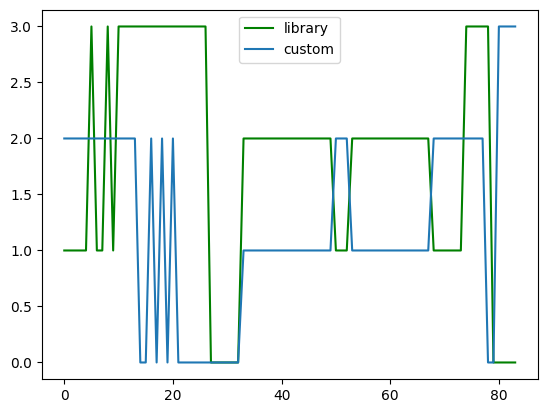

In [57]:
plt.Figure(figsize=(10,6))
plt.plot(y_pred_kmeans,color = "green",label = "library")
plt.plot(y_pred,label = "custom")
plt.legend()
plt.show()

In [60]:
import numpy as np
class kmeanscust1:
    def __init__(self,K,max_iter = 100):
        self.K = K
        self.max_iter = max_iter
        self.centroids = None
        self.labels_ = None
    def fit(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_indices]
    
        for _ in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            new_centroids = np.array([
                X[labels == k].mean(axis=0) if np.any(labels == k) else self.centroids[k]
                for k in range(self.K)
            ])
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        X = np.array(X)  # this ensures list inputs also work
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)


In [61]:
model =  kmeanscust1(4)
def predic_cluster(weight, length):
    new_data = [[weight, length]]  # 2D list
    cluster = model.predict(new_data)
    return cluster[0]

predicted_cluster = predic_cluster(290, 24)
print(f"Fish belongs to cluster {predicted_cluster}")

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

In [64]:
import numpy as np
import pandas as pd

# Sample fish data (weight and length)
data = {
    "Weight": [242.0, 290.0, 340.0, 363.0, 430.0, 500.0, 390.0, 450.0, 500.0],
    "Length": [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 30.0, 30.0, 30.7]
}
df = pd.DataFrame(data)

# Custom KMeans class
class kmeanscust1:
    def __init__(self, K, max_iter=100):
        self.K = K
        self.max_iter = max_iter
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_indices]
    
        for _ in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            new_centroids = np.array([
                X[labels == k].mean(axis=0) if np.any(labels == k) else self.centroids[k]
                for k in range(self.K)
            ])
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        X = np.array(X)  # ensures list inputs also work
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Initialize and train model
model = kmeanscust1(K=4)
model.fit(X)

# Prediction function
def predic_cluster(weight, length):
    new_data = [[weight, length]]
    cluster = model.predict(new_data)
    return cluster[0]

# Predict new fish
predicted_cluster = predic_cluster(290, 24)
print(f"Fish belongs to cluster {predicted_cluster}")


Fish belongs to cluster 3


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage = 'ward')
y  = agg.fit_predict(X)
y



array([0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3])

In [72]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3,min_samples=10)
db.fit(X)
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])